<div align="center">

# Aflevering 5

</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Opgave a


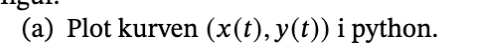

**Fremgang**
- Definér interval 
- Definér funktioner
- Plot funktioner

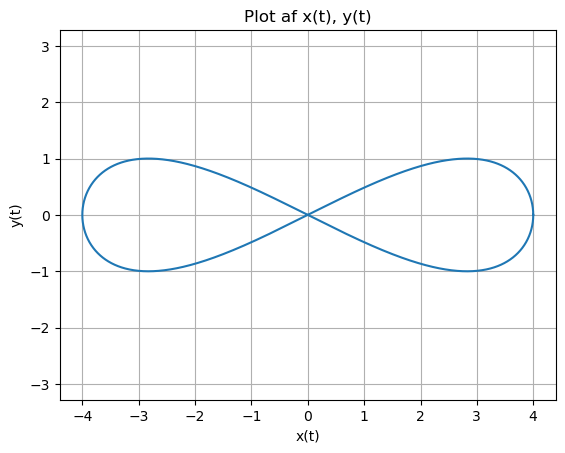

In [3]:
n=2000
t=np.linspace(0,2*np.pi,n) #Definerer intervallet fra 0<=t<2(pi)
x=4*np.cos(t)
y=np.sin(2*t)
plt.plot(x, y) ## Vi plotter de to funktioner 
plt.title('Plot af x(t), y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid(True)
plt.axis('equal')  
plt.show()

## Opgave b

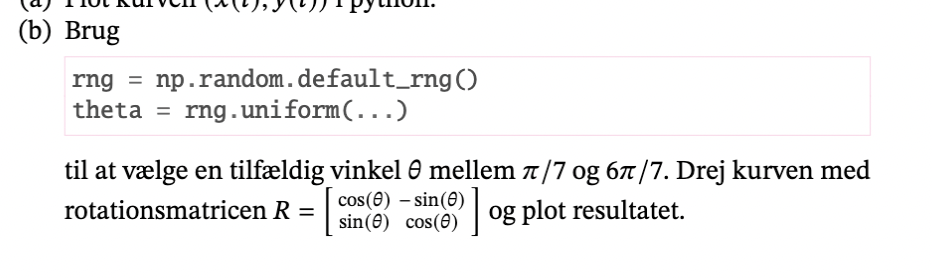

**Vi skal i opgaven vælge en tilfældig vinkel** $\theta$ **mellem** $\pi/7$ **og** $6\pi/7$
1. Vi starter derfor med at med at generere en tilfældig vinkel ved brug rng
2. Herefter danner vi rotationsmatricen ved brug af denne vinkel 
3. Dernæst ganger vi rotationsmatricen med vores samling af funktionerne x(t) ogy(t)

Tilfædlig vinkel:
 1.3042824801916058 

Rotationsmatrix:
 [[ 0.26336997 -0.9646949 ]
 [ 0.9646949  -0.26336997]] 



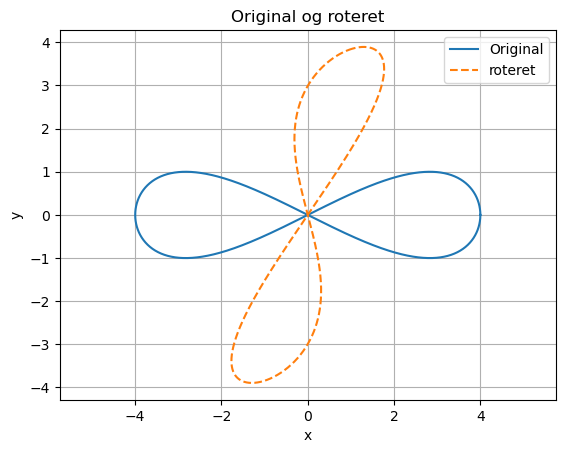

In [18]:
rng=np.random.default_rng() #Step 1: Generér tilfældig vinkel 
theta=rng.uniform(np.pi/7, 6*np.pi/7) 
print("Tilfædlig vinkel:\n",theta,"\n") # Print vores vinkel

R=np.array([[np.cos(theta), -np.sin(theta)],
            [np.sin(theta), -np.cos(theta)]]) #Rotations matrix i 2x2 matrix 
print("Rotationsmatrix:\n",R,"\n" ) #Print rotationmatrix 

Rotering=R@np.vstack((x,y)) #Samling af funktioner i et 2*n matrix 
x_rotering, y_rotering= Rotering
# Plot af den originale matrix vs roteret matrix
plt.plot(x, y, label='Original')
plt.plot(x_rotering, y_rotering, label='roteret', linestyle='--')
plt.title('Original og roteret')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()



## Opgave c

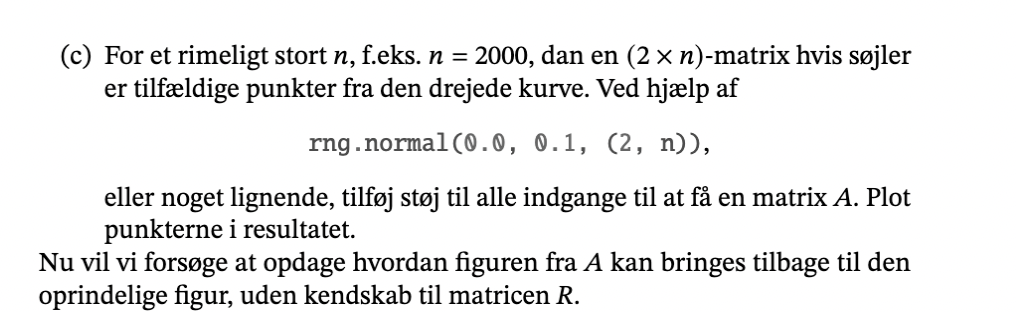

**I denne del skal vi for et rimeligt stort n danne et 2xn matrix hvis søjler er tilfældige punkter**
1. Vi starter med at generer en tilfældig støj mellem 0.0 og 0.1 med rng.normal
2. Derefter tilføjer vi støj til alle indgange i matrix "rotering fra opgave b" 
3. Til sidst vil vi så plotte vores nye matrix A 

Matrix A:
 [[1.07567649 1.24159309 1.15314724 ... 1.09138677 1.23244725 1.002516  ]
 [3.77726754 3.97044021 3.78856077 ... 3.87690508 3.93556123 3.78831544]] 



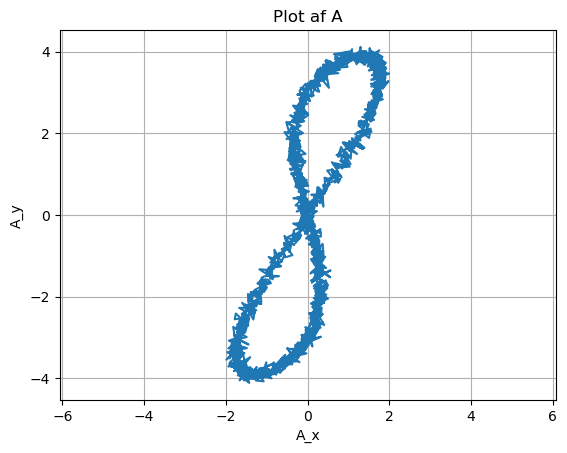

In [19]:

støj= rng.normal(0.0, 0.1, (2,n)) #Generér en tilfældig støj ved brug rng
A=Rotering+støj # Regler om rotations matrix
print("Matrix A:\n", A, "\n") #Print matrix A 

plt.plot(A[0, :], A[1, :])  # Plotter x-værdier mod y-værdier
plt.title('Plot af A')
plt.xlabel('A_x')
plt.ylabel('A_y')
plt.grid(True)
plt.axis('equal')
plt.show()


## Opgave d

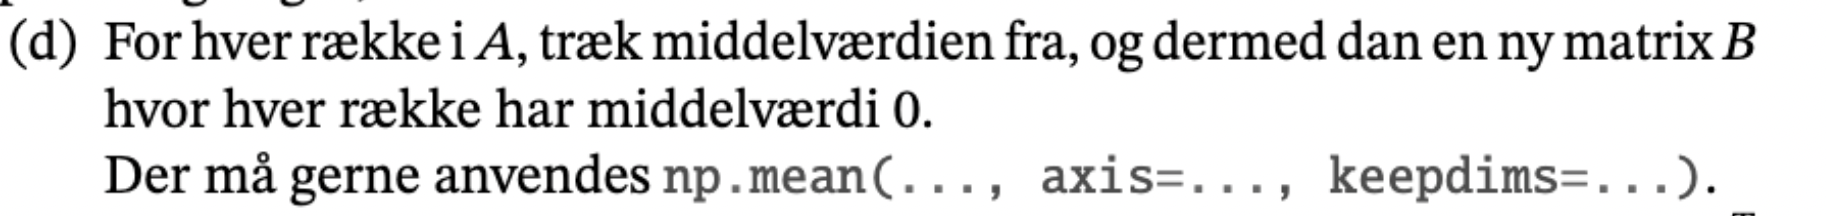

**Vi skal i opgaven for hver række i A, trække middeværdien fra og danne et nyt matrix B, hvor hver række har en middelværdi 0**
1. Vi starter med at benytte np.mean 
2. Herefter trækker vi middelværdien fra Matrix A så vi trækker middelværdien fra alle indange 

In [21]:
mean_A = np.mean(A, axis=1, keepdims=True) #Beregner middelværdien for hver række 

# Træk middelværdien fra alle elementerne i række 1 og 2
B = A - mean_A

print("Matrix B:\n", B, "\n") #print B 
print("Middelværdier for B:\n", np.mean(B, axis=1, keepdims=True)) #Vi viser at middelværdien er lig 0 i rækkerne 

Matrix B:
 [[1.07236389 1.2382805  1.14983465 ... 1.08807418 1.22913466 0.99920341]
 [3.77799352 3.97116619 3.78928675 ... 3.87763106 3.93628721 3.78904143]] 

Middelværdier for B:
 [[-5.32907052e-17]
 [ 1.13686838e-16]]


## Opgave e

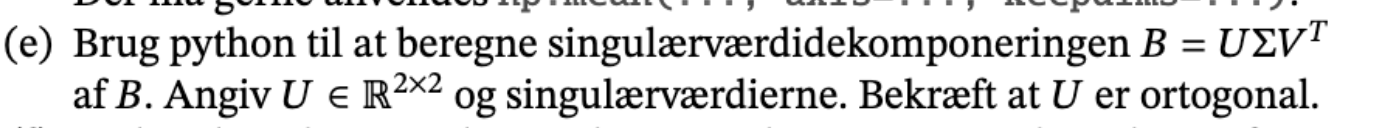

In [20]:
U, S, Vt = np.linalg.svd(B, full_matrices=False) ##Tynd svd kig notessæt 10.3 tynd SVD

print("Print af  singulærværdier:\n", S, "\n")

Print af  singulærværdier:
 [126.56852001  31.72362652] 



Vi skal tjekke orgonaliteten af U dette gør vi brug af defination 9.1 i notesæt 9 
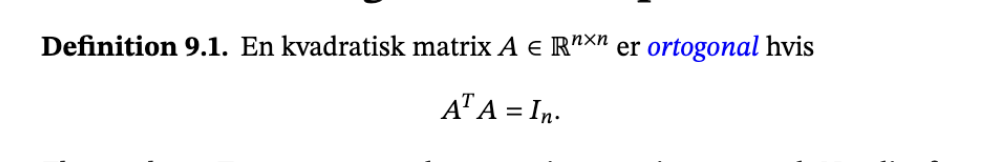

In [ ]:
print(U.shape) # Bekræfter U er et kvadratisk matrix
C=U.T@U
print("Ortogonal matrix U:\n", C, "\n") ## Bekræfter ortogonalitet 

(2, 2)
Ortogonal matrix U:
 [[ 1.00000000e+00 -7.67626729e-17]
 [-7.67626729e-17  1.00000000e+00]] 



## Opgave f 

U er retningen hvor singlærværdierne er hvor meget den vrides